In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import random
import cv2
from tqdm import tqdm_notebook as tqdm

In [2]:

image = []

for i in range(1,5):
    inp = Image.open('images/'+str(i)+'.gif')
    arr = np.asarray(inp)
    image.append(arr)

image = np.array(image)
print(image.shape)

out = mpimg.imread('images/PDCV3.jpeg')
out = np.array(out)
print(out.shape)



(4, 512, 512)
(512, 512)


In [3]:
# Getting river and non-river points

river_points = []
non_river_points = []


for i in range(512):
    for j in range(512):
        if out[i][j]==0:
            non_river_points.append(tuple([i,j]))
        else:
            river_points.append(tuple([i,j]))

In [4]:
random.shuffle(river_points)
random.shuffle(non_river_points)
river_points = np.array(river_points[:50])
non_river_points = np.array(non_river_points[:100])

In [5]:
river_image = []
non_river_image = []


status = [river_image.append([image[0][i][j], image[1][i][j], image[2][i][j], image[3][i][j]]) for i,j in river_points]
status = [non_river_image.append([image[0][i][j], image[1][i][j], image[2][i][j], image[3][i][j]]) for i,j in non_river_points]

river_image = np.array(river_image)
non_river_image = np.array(non_river_image)

In [6]:
# Mean of river and non-river points

t1 = np.mean(river_image, axis = 0)
t2 = np.mean(non_river_image, axis = 0)

river_image = river_image.astype('float64') - t1
non_river_image = non_river_image.astype('float64') - t2

river_image = np.transpose(river_image)
non_river_image = np.transpose(non_river_image)

In [7]:
# Co-variance
cov_river = np.cov(river_image)
cov_non_river = np.cov(non_river_image)
print(f"Shape of covariance matrix : {cov_river.shape}")

Shape of covariance matrix : (4, 4)


In [8]:
# River point or non-river point
P1 = 0.3
P2 = 0.7

t1 = np.reshape(t1, (4,1))
t2 = np.reshape(t2, (4,1))

inv_river = np.linalg.inv(cov_river)
inv_non_river = np.linalg.inv(cov_non_river)

det_river = np.linalg.det(cov_river)
det_non_river = np.linalg.det(cov_non_river)

for i in tqdm(range(0,512)):
    for j in range(0,512):
        data = [image[0][i][j], image[1][i][j], image[2][i][j], image[3][i][j]]
        data = np.reshape(data, (4,1))
        d1 = data-t1
        d2 = data-t2
        river_class = np.dot(np.dot(d1.T, inv_river), d1)
        non_river_class = np.dot(np.dot(d2.T, inv_non_river), d2)
        
        p1 = (-0.5/det_river)*np.exp(river_class)
        p2 = (-0.5/det_non_river)*np.exp(non_river_class)
        
        if p1*P1 >= p2*P2:
            out[i][j] = 255
        else:
            out[i][j] = 0

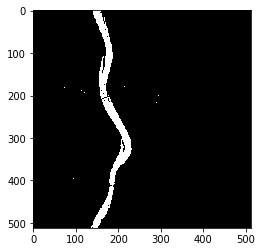

In [10]:
import matplotlib.pyplot as plt

plt.imshow(out, cmap='gray')
cv2.imwrite('out1.png', out)
plt.show()